In [1]:
import numpy as np
import pandas as pd 
import anndata as ad
import scanpy as sc

import screenpro as scp

import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=150, format='svg', frameon=False, figsize=(3, 3), color_map='RdGy', facecolor='white')

In [2]:
from screenpro.plotting import almost_black, dark2

In [44]:
# help(scp.phenoScore.getPhenotypeScore)

# help(scp.pl.plotReplicateScatter)

### load counts and metadata

In [45]:
meta = pd.read_excel('PRDX1samplesheet_incgrowth.xlsx',index_col=0)

In [46]:
adata = ad.read_h5ad('results/adata_counts.h5ad.gz')

del adata.layers

adata.obs.treatment = adata.obs.treatment.str.replace('-','T0')
adata.obs = adata.obs.rename(columns={'treatment':'condition','rep':'replicate'})

adata.obs['pop_doublings'] = meta['pop doublings'].replace('-',np.nan).astype(float)

___
- filter low counts

In [47]:
scp.utils.find_low_counts

<function screenpro.utils.find_low_counts(adata, filter_type='either', minimum_reads=50)>

In [49]:
adata.obs

,cell line,timepoint,condition,replicate,pop_doublings
index,,,,,
i01,parent,T0,T0,1,NaN
i02,parent,T0,T0,2,NaN
i03,parent,Tend,vehicle,1,8.099107
i04,parent,Tend,vehicle,2,7.760087
i05,parent,Tend,vehicle,3,7.799925
i06,parent,Tend,DNAPKi,1,7.459794
i07,parent,Tend,DNAPKi,2,7.541174
i08,parent,Tend,DNAPKi,3,7.709747
i09,PRDX1KO,T0,T0,1,NaN


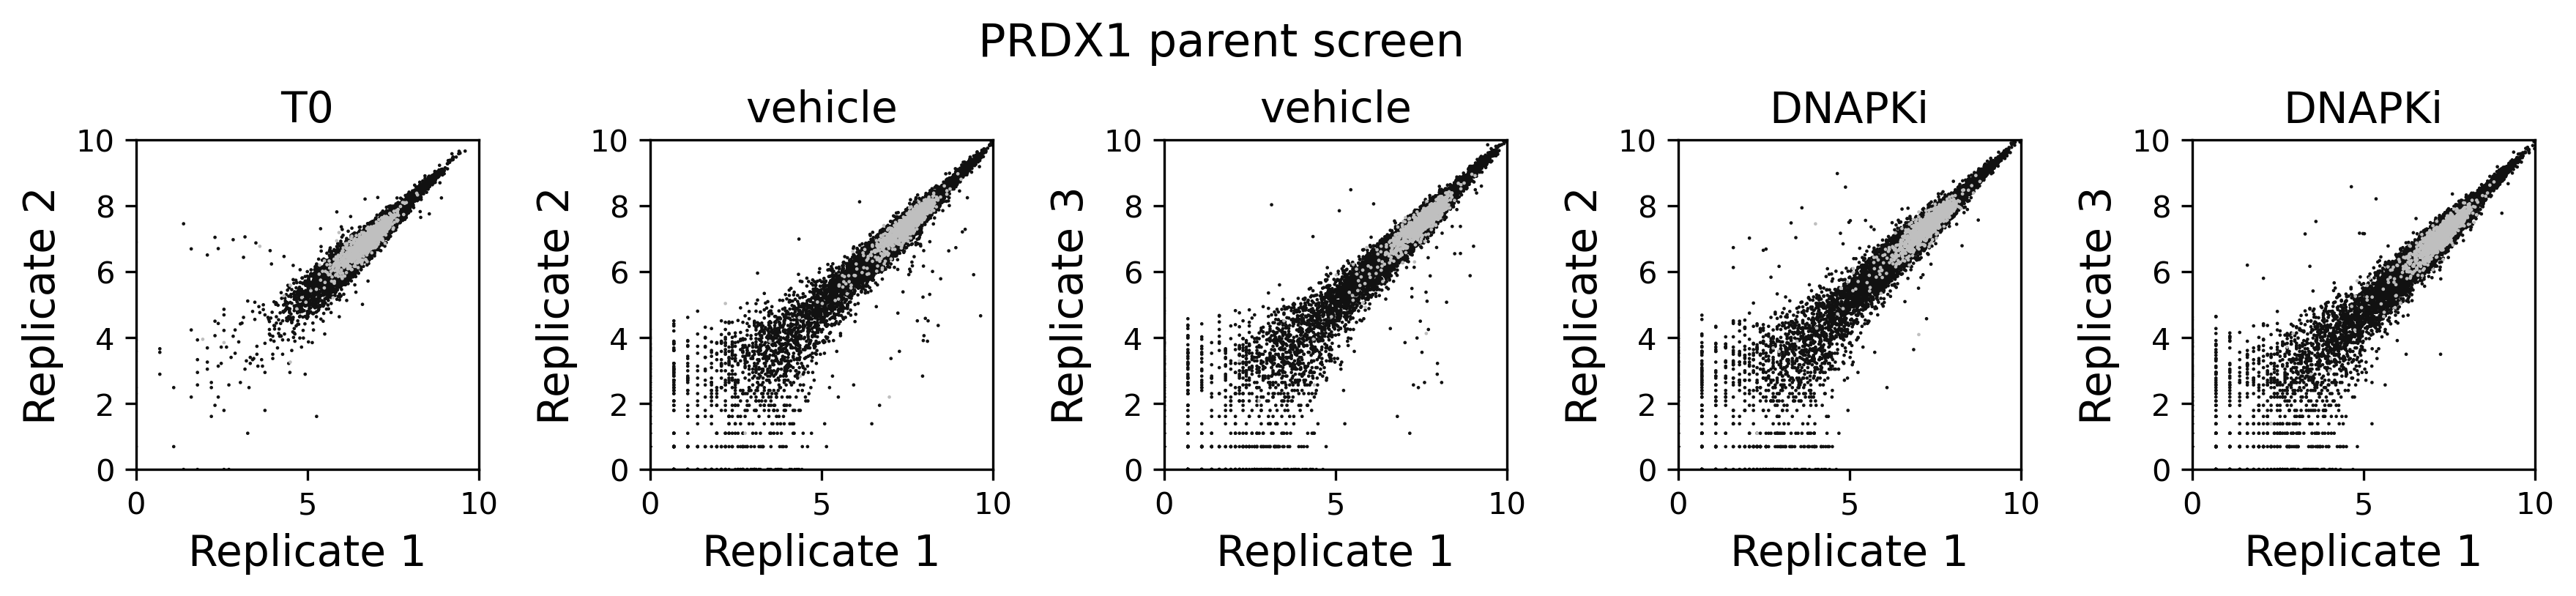

In [51]:
fig, axes = plt.subplots(ncols=5,
                         figsize=(13,3), 
                         gridspec_kw={'wspace': 0.5, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )
scp.pl.plotReplicateScatter(axes[0], adata, 'i01','i02','T0',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[1], adata, 'i03','i04','vehicle',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[2], adata, 'i03','i05','vehicle',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[3], adata, 'i06','i07','DNAPKi',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[4], adata, 'i06','i08','DNAPKi',min_val=0,max_val=10)

fig.suptitle('PRDX1 parent screen',fontsize=15)

# plt.savefig('NAC_counts_qc.pdf',bbox_inches='tight')
plt.show()

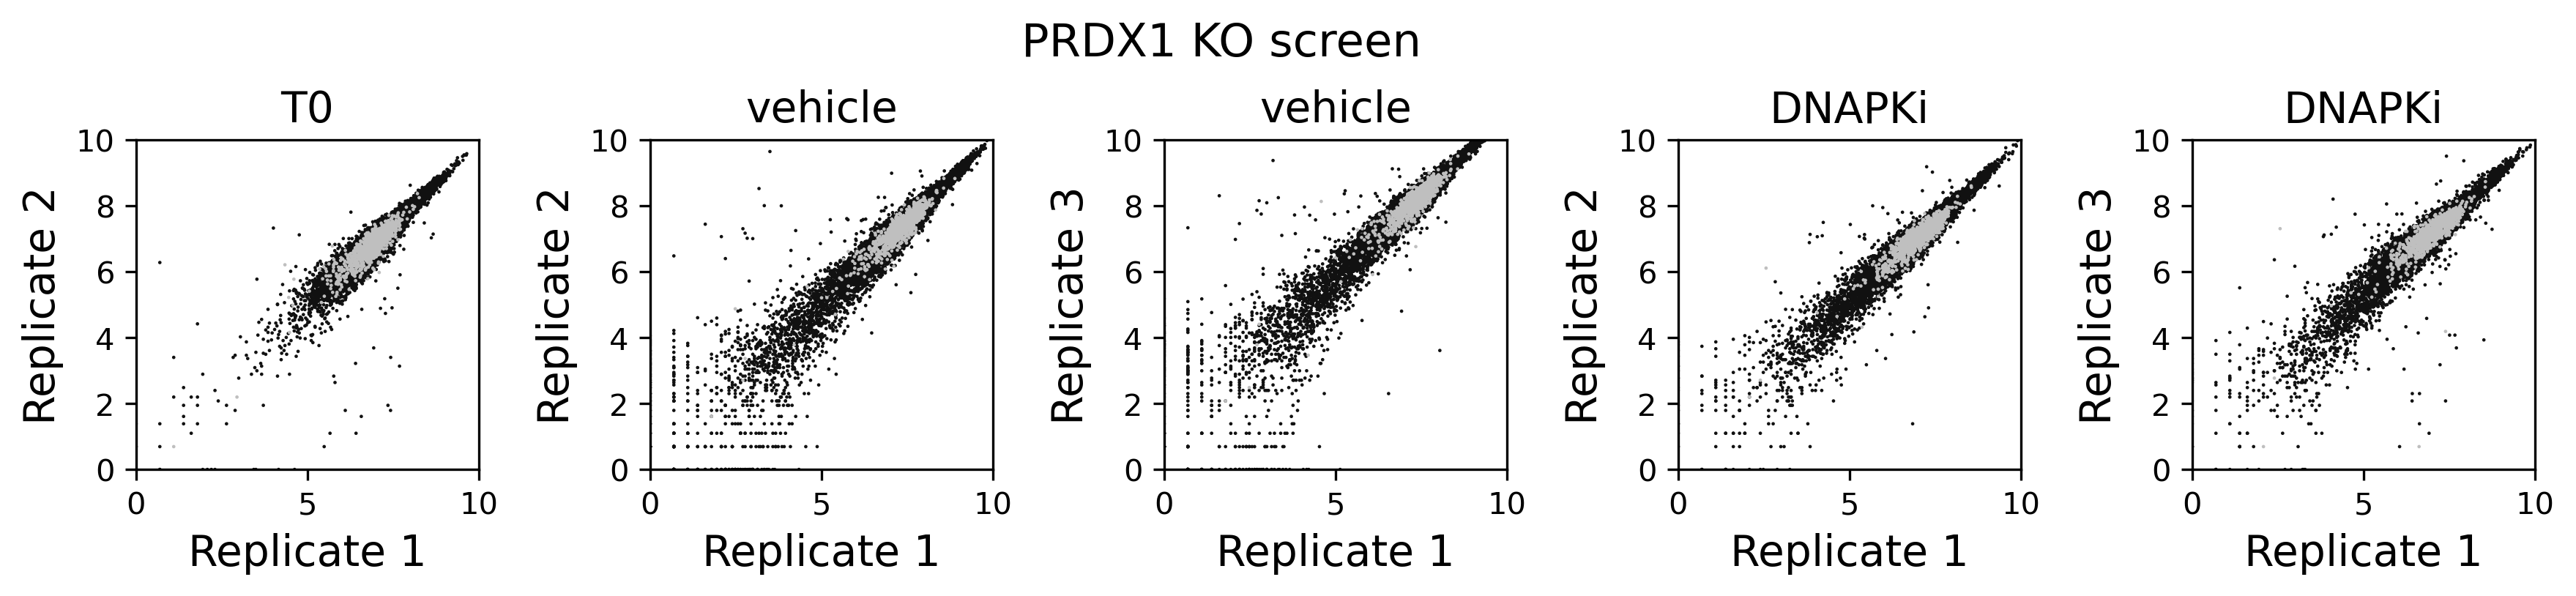

In [52]:
fig, axes = plt.subplots(ncols=5,
                         figsize=(13,3), 
                         gridspec_kw={'wspace': 0.5, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )
scp.pl.plotReplicateScatter(axes[0], adata, 'i09','i10','T0',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[1], adata, 'i11','i12','vehicle',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[2], adata, 'i11','i13','vehicle',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[3], adata, 'i14','i15','DNAPKi',min_val=0,max_val=10)
scp.pl.plotReplicateScatter(axes[4], adata, 'i14','i16','DNAPKi',min_val=0,max_val=10)

fig.suptitle('PRDX1 KO screen',fontsize=15)

# plt.savefig('NAC_counts_qc.pdf',bbox_inches='tight')
plt.show()

### scores

    'PRDX1_parent gamma vehicle_vs_T0',
    'PRDX1_parent rho DNAPKi_vs_vehicle',
    'PRDX1_parent tau DNAPKi_vs_T0',

    'PRDX1_KO gamma vehicle_vs_T0',
    'PRDX1_KO rho DNAPKi_vs_vehicle',
    'PRDX1_KO tau DNAPKi_vs_T0',
<!--     'rho vehicle_PRDX1KO_vs_vehicle_parent' -->

___

In [53]:
adata_PRDX1KO = adata[adata.obs['cell line'].eq('PRDX1KO')].copy()
adata_parent  = adata[adata.obs['cell line'].eq('parent')].copy()

### PRDX1 parent screen

In [294]:
screen0 = scp.ScreenPro(adata_parent)
screen = scp.ScreenPro(adata_parent[adata_parent.obs.replicate.isin([1,2])].copy(),n_reps=2)

screen.adata.obs

,cell line,timepoint,condition,replicate,pop_doublings,size_factors
index,,,,,,
i01,parent,T0,T0,1,NaN,0.634744
i02,parent,T0,T0,2,NaN,0.761593
i03,parent,Tend,vehicle,1,8.099107,1.307246
i04,parent,Tend,vehicle,2,7.760087,1.178480
i06,parent,Tend,DNAPKi,1,7.459794,1.013719
i07,parent,Tend,DNAPKi,2,7.541174,1.139837


___

In [295]:
scp.utils.find_low_counts(screen.adata)

41 variables with less than 50 reads in either replicates / experiment


In [296]:
# screen.adata = screen.adata[:,~screen.adata.var.low_count].copy()

In [297]:
screen.calculateDrugScreen(
    t0='T0', untreated='vehicle', treated='DNAPKi',
    db_untreated = 7.8,
    db_treated = 7.5,
    score_level='compare_reps'
)

	vehicle vs T0
	DNAPKi vs T0
	DNAPKi vs vehicle


In [298]:
help(scp.pl.plot_volcano)

Help on function plot_volcano in module screenpro.plotting:

plot_volcano(ax, df_in, threshold, up_hit='resistance_hit', down_hit='sensitivity_hit', xlim_l=-5, xlim_r=5, ylim=6)



In [299]:
gamma = screen.phenotypes['compare_reps']['gamma:vehicle_vs_T0'].iloc[:,:3].reset_index(drop=True)

tau = screen.phenotypes['compare_reps']['tau:DNAPKi_vs_T0'].iloc[:,:3].reset_index(drop=True)

rho = screen.phenotypes['compare_reps']['rho:DNAPKi_vs_vehicle'].iloc[:,:3].reset_index(drop=True)

In [300]:
gamma.score.min(),gamma.score.max(), max(-np.log10(gamma['ttest pvalue']))

(-1.3166671876964993, 0.6399593555224782, 5.0193655376136705)

In [301]:
tau.score.min(),tau.score.max(),max(-np.log10(tau['ttest pvalue']))

(-1.3838809348395398, 0.770770532131683, 4.898855171307314)

In [302]:
rho.score.min(),rho.score.max(),max(-np.log10(rho['ttest pvalue']))

(-16.07194788512976, 19.57566715810244, 4.031790337855576)

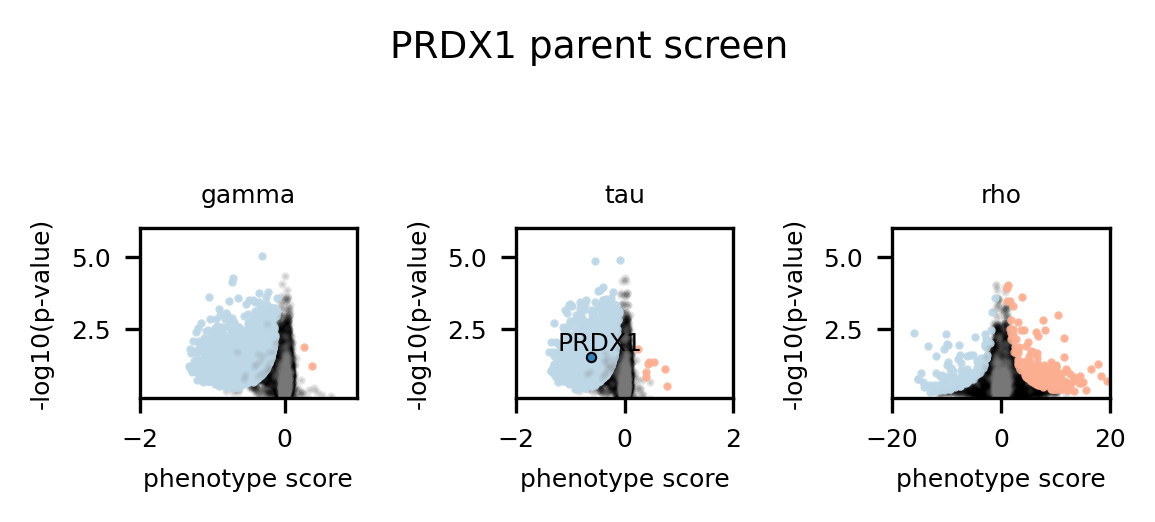

In [303]:
# Create subplots and specify the size
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(4, 1.8))

scp.pl.plot_volcano(ax1, gamma,threshold=5,xlim_l=-2, xlim_r=1)
ax1.grid(False)
ax1.get_legend().remove()
ax1.set_title('gamma')

scp.pl.plot_volcano(ax2, tau,threshold=5,xlim_l=-2, xlim_r=2)
scp.pl.label_sensitivity_hit(ax2,tau,'PRDX1',threshold=5,size=5,size_txt=6,t_x=-.6,t_y=.2)

ax2.grid(False)
ax2.get_legend().remove()
ax2.set_title('tau')

scp.pl.plot_volcano(ax3, rho,threshold=5,xlim_l=-20, xlim_r=20)
# label_resistance_hit(ax2,rho,'TTC1',size=5,size_txt=6,t_x=.1)
# label_sensitivity_hit(ax2,rho,'CLHC1',size=5,size_txt=6,t_y=.1)

ax3.grid(False)
ax3.get_legend().remove()
ax3.set_title('rho')


for ax in [ax1,ax2,ax3]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(6)

fig.suptitle('PRDX1 parent screen',fontsize=9)
plt.tight_layout()
# Show the plot
plt.show()

#### replicate level scores

In [392]:
def calculateGrowthFactor(screen, untreated, treated, db_rate_col):
    adat = screen.adata.copy()
    
    growth_factors = []
    
    # calculate growth factor for gamma, tau, or rho score per replicates
    for replicate in adat.obs.replicate.unique():
        db_untreated = adat.obs.query(f'condition == "{untreated}" & replicate == {str(replicate)}')[db_rate_col][0]
        db_treated = adat.obs.query(f'condition == "{treated}" & replicate == {str(replicate)}')[db_rate_col][0]
        
        growth_factors.append(('gamma',db_untreated,replicate))
        growth_factors.append(('tau',db_treated,replicate))
        growth_factors.append(('rho',np.abs(db_untreated-db_treated),replicate))
    
    out = pd.DataFrame(growth_factors,columns=['score','growth_factor','replicate'])
    
    return out

In [400]:
calculateGrowthFactor(screen0, untreated = 'vehicle', treated = 'DNAPKi', db_rate_col = 'pop_doublings')

,score,growth_factor,replicate
0,gamma,8.099107,1
1,tau,7.459794,1
2,rho,0.639312,1
3,gamma,7.760087,2
4,tau,7.541174,2
5,rho,0.218913,2
6,gamma,7.799925,3
7,tau,7.709747,3
8,rho,0.090178,3


In [434]:
def getReplicateScore(screen, x_label, y_label, score, growth_factor_table, ctrl_label='negCtrl'):
    """
    Calculate phenotype score for each pair of replicates.
    Args:
        screen: ScreenPro object
        x_label: name of the first condition in column `condition` of `screen.adata.obs`
        y_label: name of the second condition in column `condition` of `screen.adata.obs`
        growth_rate: growth rate term to use for normalizing phenotype score
        ctrl_label: string to identify labels of negative control oligos

    Returns:
        pd.DataFrame: dataframe of phenotype scores
    """
    adat = screen.adata.copy() #[:,~screen.adata.var['low_count']]
    
    adat_ctrl = adat[:, adat.var.targetType.eq(ctrl_label)].copy()

    results = {}

    for replicate in adat.obs.replicate.unique():
        
        res = scp.ps.getPhenotypeScore(
            x=adat[adat.obs.query(f'condition == "{x_label}" & replicate == {str(replicate)}').index].X,
            y=adat[adat.obs.query(f'condition == "{y_label}" & replicate == {str(replicate)}').index].X,

            x_ctrl=adat_ctrl[adat_ctrl.obs.query(f'condition == "{x_label}" & replicate == {str(replicate)}').index].X,
            y_ctrl=adat_ctrl[adat_ctrl.obs.query(f'condition == "{y_label}" & replicate == {str(replicate)}').index].X,

            growth_rate=growth_factor_table.query(f'score=="{score}" & replicate=={replicate}')['growth_factor'].values[0],
            math=screen.math,
            ave='row'  # there is only one column so `row` option here is equivalent to the value before averaging.
        )

        results.update({f'replicate_{replicate}': res})

    out = pd.DataFrame(
        results,
        index=adat.var.index
    )

    return out

In [435]:
growth_factor_table = calculateGrowthFactor(screen0, untreated = 'vehicle', treated = 'DNAPKi', db_rate_col = 'pop_doublings')

In [436]:
pdata = ad.AnnData(
    X=pd.concat([
        getReplicateScore(screen,'T0', 'vehicle','gamma',growth_factor_table).add_prefix('gamma_'),
        getReplicateScore(screen,'T0', 'DNAPKi','tau',growth_factor_table).add_prefix('tau_'),
        getReplicateScore(screen0,'vehicle', 'DNAPKi','rho',growth_factor_table).add_prefix('rho_')
    ],axis=1).T,
    var=screen.adata.var
)

pdata.obs['score'] = pdata.obs.index.str.split('_').str[0]
pdata.obs['replicate'] = pdata.obs.index.str.split('_').str[2]

In [437]:
pdata

AnnData object with n_obs × n_vars = 7 × 21097
    obs: 'score', 'replicate'
    var: 'target', 'targetType', 'low_count'

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


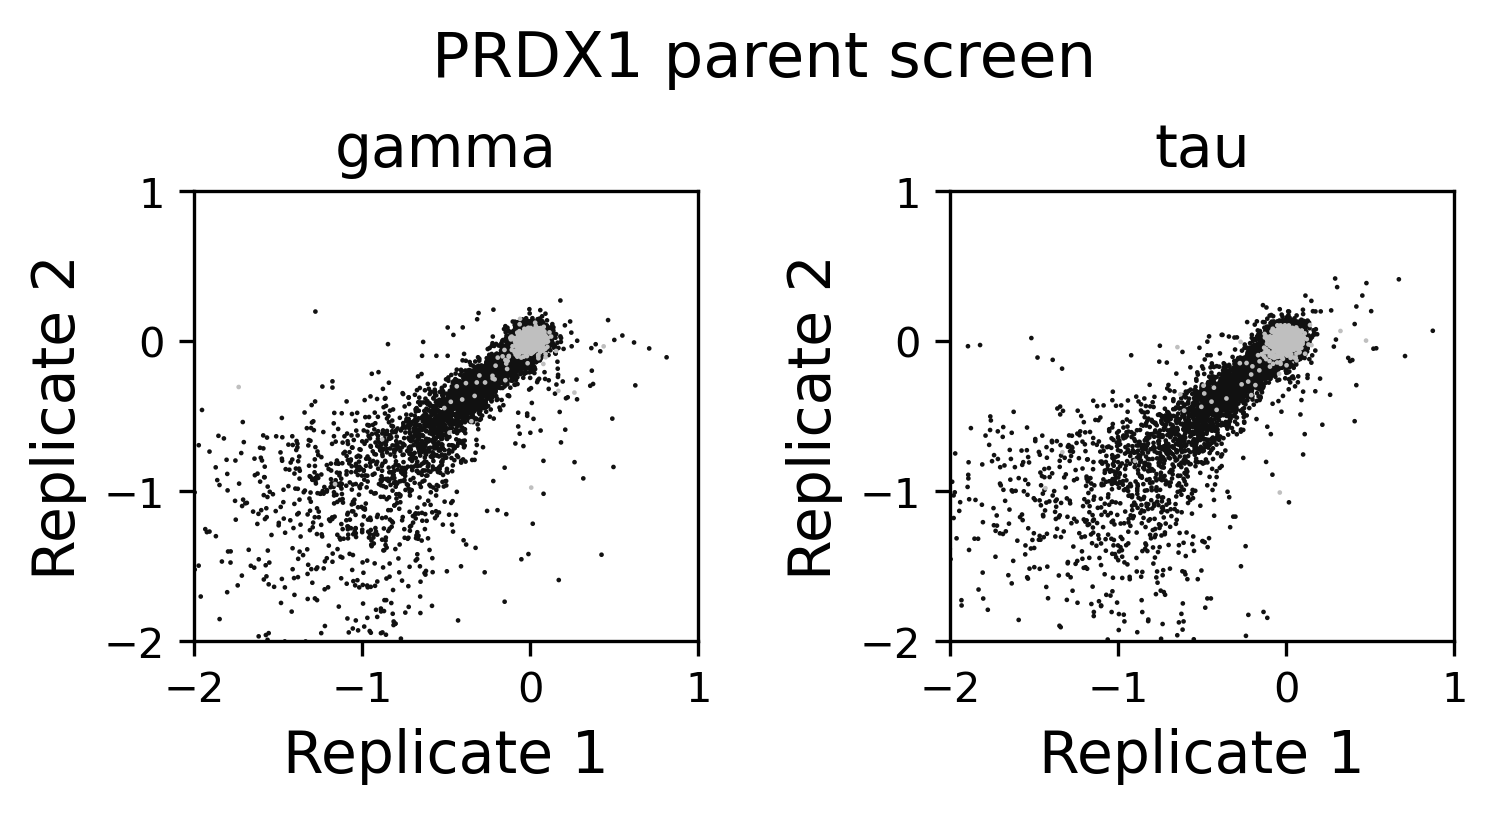

In [443]:
fig, axes = plt.subplots(ncols=2,
                         figsize=(5,3), 
                         gridspec_kw={'wspace': 0.5, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )
scp.pl.plotReplicateScatter(axes[0], pdata, 'gamma_replicate_1','gamma_replicate_2','gamma',max_val=1)
scp.pl.plotReplicateScatter(axes[1], pdata, 'tau_replicate_1','tau_replicate_2','tau',max_val=1)


fig.suptitle('PRDX1 parent screen',fontsize=15)

# plt.savefig('NAC_counts_qc.pdf',bbox_inches='tight')
plt.show()

### PRDX1 KO screen

In [282]:
screen = scp.ScreenPro(adata_PRDX1KO)

screen.adata.obs

,cell line,timepoint,condition,replicate,pop_doublings
index,,,,,
i09,PRDX1KO,T0,T0,1,NaN
i10,PRDX1KO,T0,T0,2,NaN
i11,PRDX1KO,Tend,vehicle,1,6.939640
i12,PRDX1KO,Tend,vehicle,2,7.325594
i13,PRDX1KO,Tend,vehicle,3,7.048209
i14,PRDX1KO,Tend,DNAPKi,1,1.949450
i15,PRDX1KO,Tend,DNAPKi,2,2.113679
i16,PRDX1KO,Tend,DNAPKi,3,2.469331


In [24]:
screen.n_reps = 2

In [25]:
screen.calculateDrugScreen(
    t0='T0', untreated='vehicle', treated='DNAPKi',
    db_untreated = 7.1,
    db_treated = 2.1,
    score_level='compare_reps'
)

	vehicle vs T0
	DNAPKi vs T0
	DNAPKi vs vehicle


In [26]:
gamma = screen.phenotypes['compare_reps']['gamma:vehicle_vs_T0'].iloc[:,:3].reset_index(drop=True)

tau = screen.phenotypes['compare_reps']['tau:DNAPKi_vs_T0'].iloc[:,:3].reset_index(drop=True)

rho = screen.phenotypes['compare_reps']['rho:DNAPKi_vs_vehicle'].iloc[:,:3].reset_index(drop=True)

In [103]:
gamma.score.min(),gamma.score.max(), max(-np.log10(gamma['ttest pvalue']))

(-1.606974691309949, 0.6605596055865346, 5.020886675155205)

In [104]:
tau.score.min(),tau.score.max(),max(-np.log10(tau['ttest pvalue']))

(-4.4941930199187885, 2.584907126038296, 4.649575945290513)

In [105]:
rho.score.min(),rho.score.max(),max(-np.log10(rho['ttest pvalue']))

(-0.6165078075706603, 1.4355785496018683, 4.461126290697124)

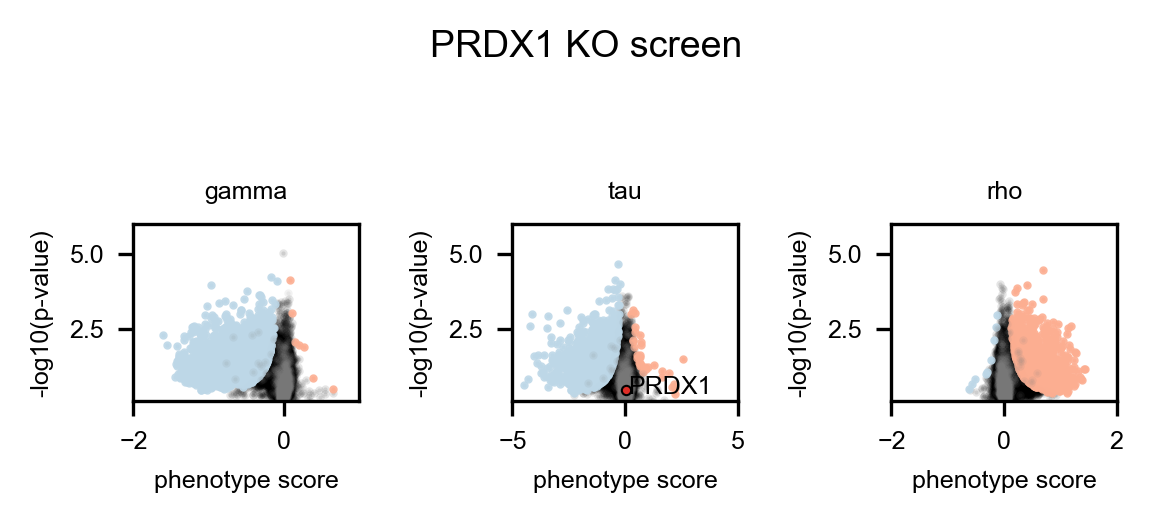

In [106]:
# Create subplots and specify the size
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(4, 1.8))

scp.pl.plot_volcano(ax1, gamma,threshold=5,xlim_l=-2, xlim_r=1)
ax1.grid(False)
ax1.get_legend().remove()
ax1.set_title('gamma')

scp.pl.plot_volcano(ax2, tau,threshold=5,xlim_l=-5, xlim_r=5)
scp.pl.label_resistance_hit(ax2,tau,'PRDX1',threshold=5,size=5,size_txt=6,t_x=.1)
# label_sensitivity_hit(ax2,rho,'CLHC1',size=5,size_txt=6,t_y=.1)

ax2.grid(False)
ax2.get_legend().remove()
ax2.set_title('tau')

scp.pl.plot_volcano(ax3, rho,threshold=5,xlim_l=-2, xlim_r=2)
# label_resistance_hit(ax2,rho,'TTC1',size=5,size_txt=6,t_x=.1)
# label_sensitivity_hit(ax2,rho,'CLHC1',size=5,size_txt=6,t_y=.1)

ax3.grid(False)
ax3.get_legend().remove()
ax3.set_title('rho')


for ax in [ax1,ax2,ax3]:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(6)

fig.suptitle('PRDX1 KO screen',fontsize=9)
plt.tight_layout()
# Show the plot
plt.show()

In [107]:
pdata = ad.AnnData(
    X=pd.concat([
        get_replicate_score(screen,'T0', 'vehicle').add_prefix('gamma_'),
        get_replicate_score(screen,'T0', 'DNAPKi').add_prefix('tau_'),
        get_replicate_score(screen,'vehicle', 'DNAPKi').add_prefix('rho_')
    ],axis=1).T,
    var=screen.adata.var
)

pdata.obs['score'] = pdata.obs.index.str.split('_').str[0]
pdata.obs['replicate'] = pdata.obs.index.str.split('_').str[2]

/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/94/b_7221fj6j380ss7gybjl7yr0000gq/T/ipykernel_15188/2476915187.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warn

/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/opt/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


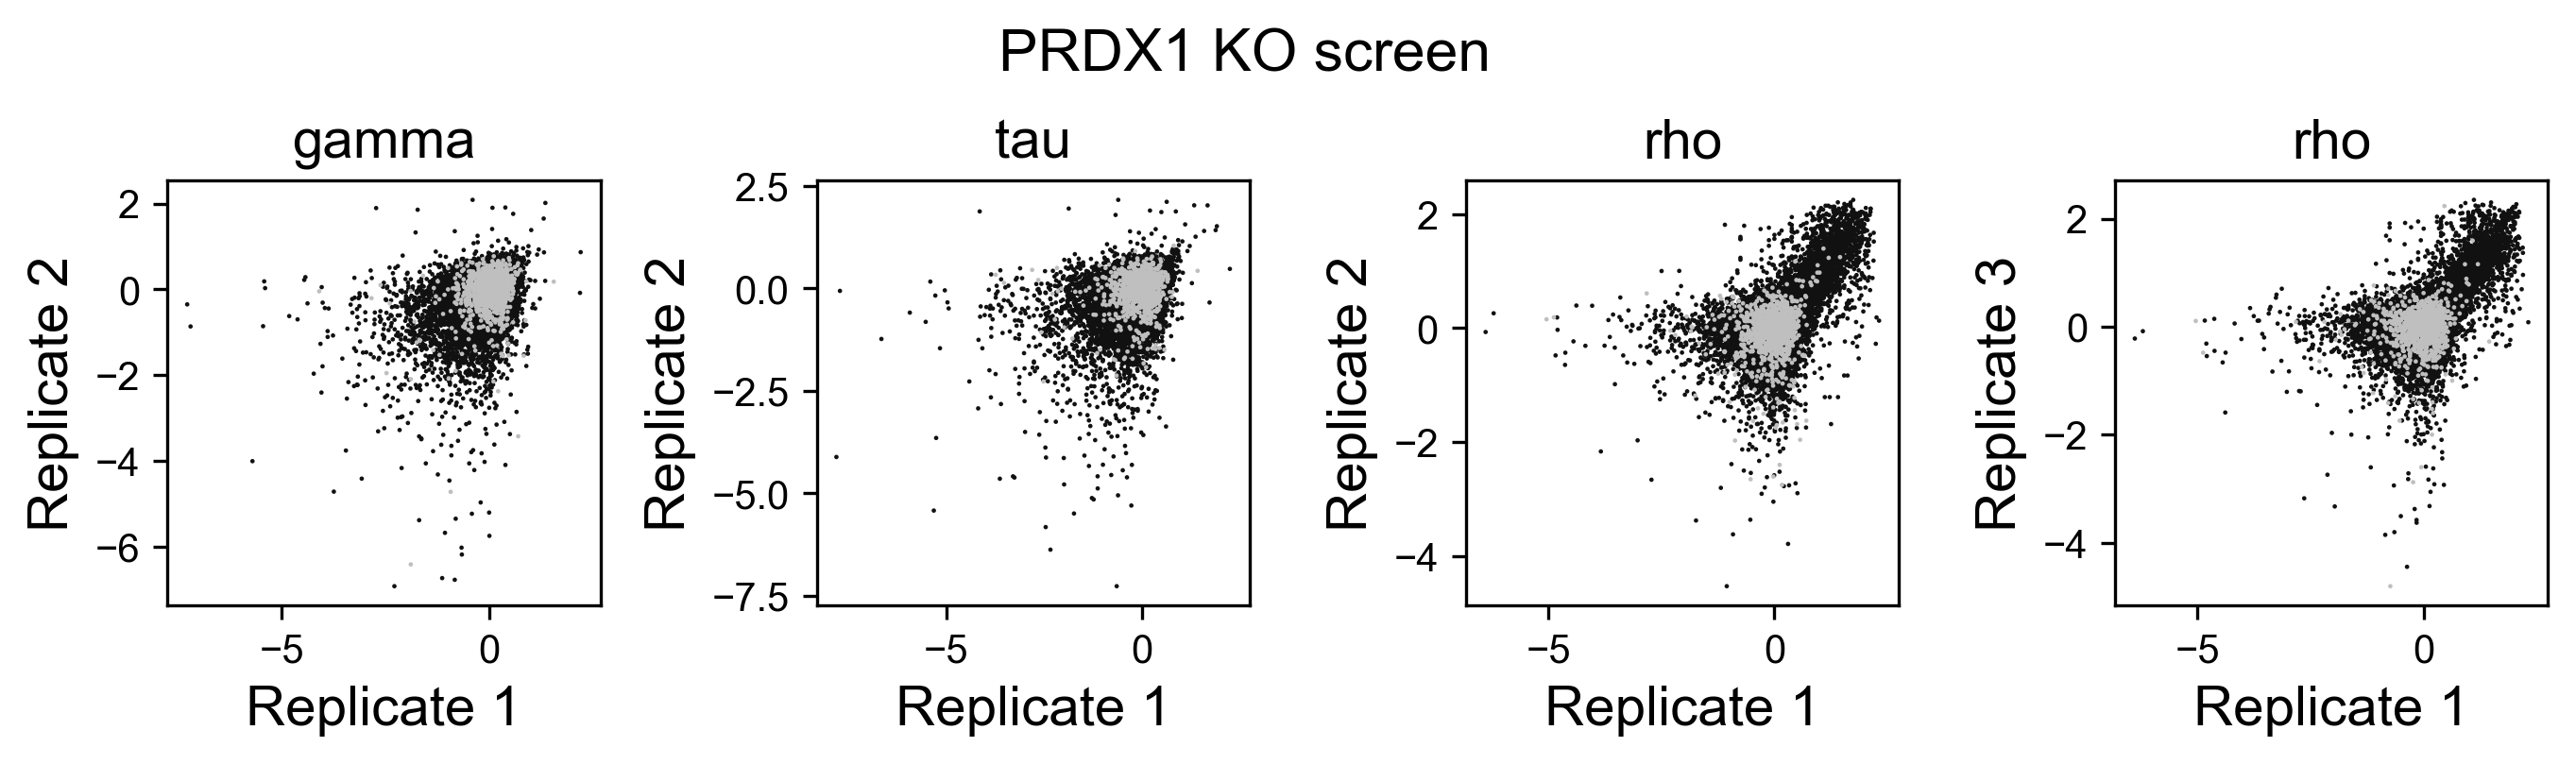

In [132]:
fig, axes = plt.subplots(ncols=4,
                         figsize=(10,3), 
                         gridspec_kw={'wspace': 0.5, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )
scp.pl.plotReplicateScatter(pdata, 'gamma_replicate_1','gamma_replicate_2','gamma', axes[0])
scp.pl.plotReplicateScatter(pdata, 'tau_replicate_1','tau_replicate_2','tau', axes[1])

scp.pl.plotReplicateScatter(pdata, 'rho_replicate_1','rho_replicate_2','rho', axes[2])
scp.pl.plotReplicateScatter(pdata, 'rho_replicate_1','rho_replicate_3','rho', axes[3])

fig.suptitle('PRDX1 KO screen',fontsize=15)

# plt.savefig('NAC_counts_qc.pdf',bbox_inches='tight')
plt.show()

# 

In [114]:
%reload_ext watermark

In [115]:
%watermark

Last updated: 2023-12-14T16:21:15.301945-08:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.15.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 10
Architecture: 64bit



In [116]:
%watermark --iversions

scanpy    : 1.9.1
screenpro : 0.2.5
anndata   : 0.8.0
numpy     : 1.26.2
matplotlib: 3.6.2
pandas    : 1.5.3



In [117]:
!date

Thu Dec 14 16:21:16 PST 2023
